# Creating A Training Set From A1_D1 data


## Import pyMez and pyMez.Code.Analysis.SParameter  

In [1]:
import os
from pyMez import *
from pyMez.Code.Analysis.SParameter import *
from pyMez.Code.Analysis.SParameter import *
from pyMez.Code.DataHandlers.NISTModels import *
import sys
sys.path.insert(0, '..')
from Machine_Learning import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 4.162 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.607 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 11.567 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.013 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.42 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.037 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 2.932 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.06 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.011 s to import Code.Utils.Names
It took 19.809 s to import all of the active modules


ImportError: No module named Machine_Learning

## Define the files to be imported

In [2]:
pretrain_folder=r"C:\Share\WaveParameter Machine Learning\Pretrain"
pretrain_files=os.listdir(pretrain_folder)
pretrain_files=map(lambda x:os.path.join(pretrain_folder,x),pretrain_files)


## Join all the files using the fact they are descendants of AsciiDataTable

In [3]:
first_file=W2P(pretrain_files[0])
joined_file=first_file.copy()
for file_name in pretrain_files[1:]:
    joined_file=joined_file+W2P(file_name)

FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_1.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_10.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_100.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_11.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_12.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_13.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_14.w2p sucessfully parsed
FAILED to imp

## Creating a Mean and Standard Deviation w2p

In [4]:
mean_file=frequency_model_collapse_multiple_measurements(joined_file)

In [5]:
std_file=frequency_model_collapse_multiple_measurements(joined_file,method="std")

## Extracting the amplitudes

In [6]:
mean_A1_D1=[complex(re_A1_D1,mean_file["imA1_D1"][index])
            for index,re_A1_D1 in enumerate(mean_file["reA1_D1"])]

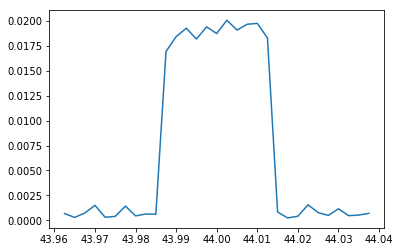

In [7]:
plt.plot(mean_file["Frequency"],np.abs(np.array(mean_A1_D1)))
plt.show()

In [8]:
std_A1_D1=np.abs(np.array([complex(re_A1_D1,std_file["imA1_D1"][index]) for index,re_A1_D1 
                           in enumerate(std_file["reA1_D1"])]))

In [9]:
std_A1_D1

array([1.10599624e-04, 4.45648730e-05, 1.20959027e-04, 2.44526386e-04,
       5.96689057e-05, 7.60821506e-05, 2.25929476e-04, 7.69835803e-05,
       1.10783209e-04, 1.10202421e-04, 2.99874012e-03, 3.18138408e-03,
       3.13629845e-03, 3.02386536e-03, 3.11291727e-03, 3.12340561e-03,
       3.15913795e-03, 3.08354194e-03, 3.17816992e-03, 3.34501964e-03,
       3.28707399e-03, 1.31120365e-04, 3.83965449e-05, 6.92452537e-05,
       2.55134696e-04, 1.25966495e-04, 8.18400500e-05, 1.97131253e-04,
       7.81792250e-05, 9.03602214e-05, 1.11720817e-04])

In [17]:
plt.fill_between(mean_file["Frequency"],np.abs(np.array(mean_A1_D1))-std_A1_D1,np.abs(np.array(mean_A1_D1))+std_A1_D1, 
                 edgecolor=(0, .0, .0, .25),
                        facecolor=(.25, .25, .25, .25),
                        linewidth=1)
plt.plot(mean_file["Frequency"],np.abs(np.array(mean_A1_D1)),'k')
plt.show()

## Building the Training Set

In [11]:
number_training_sets=1000
training_arrays=np.array([np.random.normal(loc=a1_d1,scale=std_A1_D1[index],
                                           size=number_training_sets) for index,
                          a1_d1 in enumerate(np.abs(np.array(mean_A1_D1)))])

training_arrays=[[training_arrays[i][j] for i in range(len(np.abs(np.array(mean_A1_D1))))] for j in range(number_training_sets)]

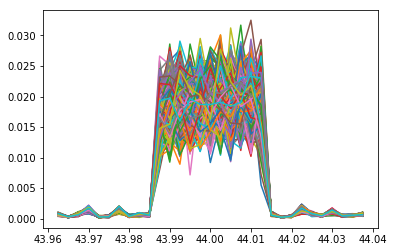

In [12]:
# Don't do this step if number_training_sets is BIG!!!
for training_array in training_arrays:
    plt.plot(mean_file["Frequency"],np.abs(training_array))

plt.show()

In [25]:
%matplotlib wx
plt.rcParams.update({'font.size': 18})
for index,training_array in enumerate(training_arrays[0:5]):
    plt.plot(mean_file["Frequency"],np.abs(training_array), label="Training Set {0}".format(index+1))

plt.plot(mean_file["Frequency"],np.abs(np.array(mean_A1_D1)),'k--',label="Mean Amplitude")

plt.fill_between(mean_file["Frequency"],np.abs(np.array(mean_A1_D1))-std_A1_D1,np.abs(np.array(mean_A1_D1))+std_A1_D1, 
                 edgecolor=(0, .0, .0, .5),
                        facecolor=(.25, .25, .25, .5),
                        linewidth=1, label="$\sigma_{a_{1}}$")
plt.legend()
plt.ylabel("$|a_{1}| (arb.)$")
plt.xlabel("Frequency (GHz)")
plt.show()

In [463]:
def meanOfY(col,dataArray):
    meanSet = []
    for i in range(1, len(dataArray)):
        y = dataArray[i][col]
        meanSet.append(y)
    return np.mean(meanSet)

def generate_mean_curve(dataSet):
    meanperFreq = []
    for col in range(0, len(dataSet[0])):
        meanperFreq.append(meanOfY(col, dataSet))
    return meanperFreq
        
        

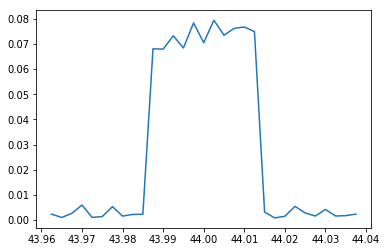

In [464]:
listofFreq = mean_file["Frequency"]
plt.plot(listofFreq,generate_mean_curve(training_data))

In [465]:
def generatetoleranceplt(tolerance):
    ymean = generate_mean_curve(training_data)
    plt.plot(listofFreq, ymean)
    t = tolerance
    pTolerance = []
    mTolerance = []
    for i in range(0, len(ymean)):
        pTolerance.append(ymean[i] + t)
        mTolerance.append(ymean[i] - t)
    plt.plot(freqs, pTolerance)
    plt.plot(freqs, mTolerance)
    plt.ylabel('wave parameter (dB)')
    plt.xlabel('frequency (Hz)')
    return [listofFreq, mTolerance, pTolerance]

[[43.9625,
  43.965,
  43.9675,
  43.97,
  43.9725,
  43.975,
  43.9775,
  43.98,
  43.9825,
  43.985,
  43.9875,
  43.99,
  43.9925,
  43.995,
  43.9975,
  44.0,
  44.0025,
  44.005,
  44.0075,
  44.01,
  44.0125,
  44.015,
  44.0175,
  44.02,
  44.0225,
  44.025,
  44.0275,
  44.03,
  44.0325,
  44.035,
  44.0375],
 [-0.00029557735149612343,
  -0.001622862081482968,
  3.0004126369397727e-06,
  0.0033059748828715195,
  -0.0016114119222152333,
  -0.0012512239065601343,
  0.002676123578540938,
  -0.0010811424536292095,
  -0.000420426039355039,
  -0.00035183648670179205,
  0.06537331692929592,
  0.06523412844346875,
  0.07055175158881874,
  0.06571759760884988,
  0.07565457620556103,
  0.06780230899267357,
  0.07671823622522185,
  0.07078011711234171,
  0.07348575896569368,
  0.07404217885321111,
  0.07221553696946686,
  0.000517777718854646,
  -0.0018028890166868553,
  -0.0011320513491058601,
  0.0028019796734044056,
  0.000180261917267202,
  -0.0010532238701674926,
  0.0015553358385678

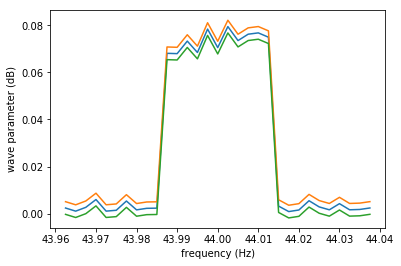

In [466]:
generatetoleranceplt(0.002690689499623095)

# Training the Classifier

In [496]:
classifiers = {
            "quadraticdiscriminantanalysis": QuadraticDiscriminantAnalysis(),
        }

In [508]:
training_list = training_arrays 
target_list = []
for i in range(0,1000):
    x = 1
    target_list.append(x)
training_arr = np.array(training_list)
target_arr = np.array(target_list)



In [509]:
QDA = QuadraticDiscriminantAnalysis()

In [511]:
QDA.fit(training_arr, target_arr)


ValueError: y has less than 2 classes

In [512]:
 for key, value in data_dictionary.iteritems():
        # If the value at the current key is a numpy array, we just add all of it's values to the training list,
        # and it's key multiple times to the target list.
        if isinstance(value, np.ndarray):
            training_list.extend(value.tolist())
            target_list.extend([key] * len(value))
        # We do the same thing with the list.
        elif isinstance(value, list):
            training_list.extend(value)
            target_list.extend([key] * len(value))
        # If the value at the current key is another form of iterable, we convert it to a list and do the same thing.
        elif isinstance(value, Iterable):
            value_as_list = list(value)
            training_list.extend(value_as_list)
            target_list.extend([key] * len(value_as_list))
        # If the value is not any type of iterable, we raise a ValueError.
        else:
            raise ValueError("keyword argument has been inputted that is not an array or iterable")

NameError: name 'data_dictionary' is not defined